___

#### Rick Fontenot
___


<a id="main"></a>
# Lab 2: Classification/Regression

This Notebook will cover the following topics in order: 

1) <a href="#Prologue">Preliminary raw data prepartion</a> <br>
<br />
2) <a href="#dataClass">Data preparation: *Classification Task*</a>
* <a href="#defineClass">Part 1: </a> Define and prepare your class variables
* <a href="#describeClass">Part 2: </a> Describe the final dataset that is used for classification/regression

3) <a href="#M&EClass">Modeling and Evaluation: *Classification Task* </a>
* <a href="#MetricsClass">Part 1: </a> Choose and explain your evaluation metrics
* <a href="#SplitClass">Part 2: </a> Choose method you will use for dividing your data into train-test-split
* <a href="#LogRegClass">Part 3: </a>Create three classification models: <a href="#LogRegClass">Logistic Regression</a>, <a href="#KNNClass">KNN</a>, <a href="#RFClass">Random Forest</a>.
* <a href="#AnalClass">Part 4: </a> Analyze the results
* <a href="#DissClass">Part 5: </a> Discuss advantages
* <a href="#ImpClass">Part 6: </a> Which attributes are important

 

<a id="Prologue"></a>
# Preliminary Data Preparation
Cleaning raw data and new feature creation

- Imports
- load data
- Data Quality 
- New Features
- Check missing values
- handling missing values
- check for duplicates

In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno


### Load the raw data


In [3]:
# Load Raw Data
diabetes=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/QTW/main/Case%20Study%202/data/diabetic_data.csv")

diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes.shape

(101766, 50)

In [5]:
# Examin Data types
diabetes.dtypes


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

### Check missing values
This check is done to ensure we've preserved the data integrity and its missing values.

In [6]:
diabetes.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

### Replace '?' with NaN for missing values and re-summarize



In [7]:
diabetes = diabetes.replace('?', np.NAN)


missing_counts = pd.DataFrame(diabetes.isna().sum())
missing_counts.rename(columns={ missing_counts.columns[0]: "count" }, inplace = True)


missing_counts = missing_counts.sort_values('count', ascending=False)


missing_counts.head(10)

,count
weight,98569
medical_specialty,49949
payer_code,40256
race,2273
diag_3,1423
diag_2,358
diag_1,21
encounter_id,0
tolazamide,0
glyburide,0


## Variables with missing values

The dataset has 101766 total records with 49 features (2 of which are identifiers) and the target "readmitted". The following 7 variables have missing values:

weight : 98569 / 101766 = 97% missing <br>
medical_specialty : 49949 / 101766 = 49% missing <br>
payer_code : 40256 / 101766 = 40% missing <br>
race : 2273 / 101766 = 2% missing <br>
diag_3 : 1423 / 101766 = 1% missing <br>
diag_2 : 358  / 101766 = <1% missing

### Explore missing values for weights for possible imputing 

In [8]:
print(diabetes.weight.unique())

[nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


In [9]:
weight_by_age = pd.DataFrame(pd.crosstab(diabetes.weight, diabetes.age, normalize='index'))
weight_by_age.head(100)

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,,,,,,,,,,
>200,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000
[0-25),0.062500,0.000000,0.020833,0.020833,0.145833,0.083333,0.250000,0.291667,0.125000,0.000000
[100-125),0.000000,0.000000,0.014400,0.016000,0.105600,0.220800,0.308800,0.278400,0.056000,0.000000
[125-150),0.000000,0.000000,0.006897,0.062069,0.172414,0.310345,0.248276,0.151724,0.048276,0.000000
[150-175),0.000000,0.000000,0.028571,0.057143,0.114286,0.314286,0.371429,0.114286,0.000000,0.000000
[175-200),0.000000,0.000000,0.000000,0.000000,0.363636,0.454545,0.090909,0.090909,0.000000,0.000000
[25-50),0.020619,0.041237,0.010309,0.041237,0.072165,0.134021,0.134021,0.154639,0.298969,0.092784
[50-75),0.000000,0.015608,0.043478,0.026756,0.042363,0.107023,0.172798,0.268673,0.257525,0.065775
[75-100),0.000000,0.000000,0.012725,0.025449,0.059880,0.140719,0.220808,0.349551,0.172904,0.017964


In [10]:
diabetes['weight'] = diabetes['weight'].astype('category')
diabetes['weight'].cat.reorder_categories(['[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '>200'], inplace=True)
print(diabetes.weight.unique())

weight_by_age = pd.DataFrame(pd.crosstab(diabetes.weight, diabetes.age, normalize='index'))
weight_by_age.head(100)

[NaN, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)', '[125-150)', '[175-200)', '[150-175)', '>200']
Categories (9, object): ['[0-25)', '[25-50)', '[50-75)', '[75-100)', ..., '[125-150)', '[150-175)', '[175-200)', '>200']


age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,,,,,,,,,,
[0-25),0.062500,0.000000,0.020833,0.020833,0.145833,0.083333,0.250000,0.291667,0.125000,0.000000
[25-50),0.020619,0.041237,0.010309,0.041237,0.072165,0.134021,0.134021,0.154639,0.298969,0.092784
[50-75),0.000000,0.015608,0.043478,0.026756,0.042363,0.107023,0.172798,0.268673,0.257525,0.065775
[75-100),0.000000,0.000000,0.012725,0.025449,0.059880,0.140719,0.220808,0.349551,0.172904,0.017964
[100-125),0.000000,0.000000,0.014400,0.016000,0.105600,0.220800,0.308800,0.278400,0.056000,0.000000
[125-150),0.000000,0.000000,0.006897,0.062069,0.172414,0.310345,0.248276,0.151724,0.048276,0.000000
[150-175),0.000000,0.000000,0.028571,0.057143,0.114286,0.314286,0.371429,0.114286,0.000000,0.000000
[175-200),0.000000,0.000000,0.000000,0.000000,0.363636,0.454545,0.090909,0.090909,0.000000,0.000000
>200,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='age', ylabel='weight'>

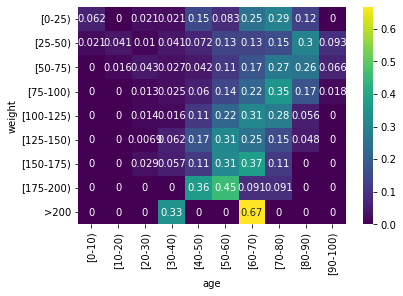

In [11]:
sns.heatmap(weight_by_age,annot=True,cmap='viridis')

While there is correlation between weight and age, imputing weight which has 97% missing based on age which essentially be copying the age feature and introduce multicollinearity issue. Also, there are people in the 60-70 and 70-80 age range that show a weight of 0-25 which does not make a lot of sense. You'd expect the 0-25lbs to be in the 0-10 age group.

### We will drop the weight feature from modeling as it seems uneliable

In [12]:
diabetes_imputed = diabetes.drop('weight', axis=1)
diabetes_imputed.shape


(101766, 49)

## Explore medical_specialty for possible imputing

In [13]:
print(len(diabetes.medical_specialty.unique()))
print(diabetes.medical_specialty.unique())

73
['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases' 'Anesthesiology'
 'Rheumatology' 'AllergyandImmunology' 'Surgery-Maxillofacial'
 'Pediatrics-InfectiousDisea

In [14]:
readmission_by_medical_specialty = pd.DataFrame(pd.crosstab(diabetes.readmitted, diabetes.medical_specialty, normalize='index'))
readmission_by_medical_specialty.head(100)

medical_specialty,AllergyandImmunology,Anesthesiology,Anesthesiology-Pediatric,Cardiology,Cardiology-Pediatric,DCPTEAM,Dentistry,Dermatology,Emergency/Trauma,Endocrinology,Endocrinology-Metabolism,Family/GeneralPractice,Gastroenterology,Gynecology,Hematology,Hematology/Oncology,Hospitalist,InfectiousDiseases,InternalMedicine,Nephrology,Neurology,Neurophysiology,Obsterics&Gynecology-GynecologicOnco,Obstetrics,ObstetricsandGynecology,Oncology,Ophthalmology,Orthopedics,Orthopedics-Reconstructive,Osteopath,Otolaryngology,OutreachServices,Pathology,Pediatrics,Pediatrics-AllergyandImmunology,Pediatrics-CriticalCare,Pediatrics-EmergencyMedicine,Pediatrics-Endocrinology,Pediatrics-Hematology-Oncology,Pediatrics-InfectiousDiseases,Pediatrics-Neurology,Pediatrics-Pulmonology,Perinatology,PhysicalMedicineandRehabilitation,PhysicianNotFound,Podiatry,Proctology,Psychiatry,Psychiatry-Addictive,Psychiatry-Child/Adolescent,Psychology,Pulmonology,Radiologist,Radiology,Resident,Rheumatology,Speech,SportsMedicine,Surgeon,Surgery-Cardiovascular,Surgery-Cardiovascular/Thoracic,Surgery-Colon&Rectal,Surgery-General,Surgery-Maxillofacial,Surgery-Neuro,Surgery-Pediatric,Surgery-Plastic,Surgery-PlasticwithinHeadandNeck,Surgery-Thoracic,Surgery-Vascular,SurgicalSpecialty,Urology
readmitted,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<30,0.000538,0.000179,0.000179,0.076220,0.000179,0.000000,0.000000,0.000000,0.151722,0.001076,0.000179,0.158357,0.011119,0.000000,0.004663,0.007174,0.000717,0.001435,0.295194,0.044476,0.002152,0.000000,0.000359,0.000179,0.005739,0.011836,0.000359,0.02708,0.016499,0.000538,0.000359,0.000179,0.000179,0.002869,0.000000,0.000538,0.000000,0.000179,0.000179,0.000000,0.000000,0.000359,0.000000,0.010760,0.000359,0.001793,0.000000,0.018651,0.000000,0.000179,0.001435,0.017217,0.018472,0.001435,0.000179,0.000538,0.000000,0.000000,0.000717,0.001076,0.007712,0.000179,0.061334,0.000179,0.005739,0.000000,0.001255,0.000000,0.001973,0.013271,0.000359,0.012195
>30,0.000173,0.000173,0.000289,0.106931,0.000231,0.000058,0.000173,0.000058,0.173466,0.002251,0.000058,0.153673,0.012349,0.000577,0.001385,0.003693,0.001096,0.000692,0.272549,0.038433,0.002655,0.000000,0.000289,0.000115,0.006348,0.005771,0.000635,0.01887,0.016908,0.001039,0.001673,0.000289,0.000577,0.004559,0.000173,0.001616,0.000058,0.001327,0.000000,0.000058,0.000231,0.000981,0.000000,0.005424,0.000231,0.002770,0.000000,0.015119,0.000000,0.000115,0.002020,0.018928,0.022102,0.000808,0.000058,0.000289,0.000000,0.000058,0.000462,0.001385,0.007502,0.000173,0.060361,0.000115,0.004386,0.000115,0.000577,0.000058,0.001731,0.011541,0.000519,0.010676
NO,0.000035,0.000277,0.000450,0.106323,0.000069,0.000173,0.000035,0.000000,0.128424,0.002594,0.000208,0.134685,0.009961,0.001660,0.001107,0.003563,0.001176,0.000588,0.285902,0.024177,0.005015,0.000035,0.000623,0.000553,0.018297,0.006295,0.000865,0.03189,0.029330,0.000623,0.003251,0.000208,0.000208,0.005499,0.000000,0.001937,0.000069,0.004669,0.000104,0.000000,0.000208,0.000208,0.000035,0.008197,0.000173,0.001453,0.000035,0.016879,0.000035,0.000138,0.002006,0.015461,0.022620,0.001072,0.000000,0.000311,0.000035,0.000000,0.001141,0.002352,0.016568,0.000242,0.059180,0.000277,0.012452,0.000208,0.000830,0.000000,0.002352,0.008958,0.000761,0.014942


With 73 unique values and no other features to help impute missing records, we will fill the medical_specialty NA's with "missing" to preserve the rows from being dropped and still gain prediction possibilities from other features

In [15]:

diabetes_imputed.medical_specialty = diabetes_imputed.medical_specialty.fillna("missing")
diabetes_imputed.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,missing,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,missing,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,missing,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,missing,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NaN,missing,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,NaN,missing,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,NaN,missing,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,NaN,missing,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,NaN,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Explore payer_code

In [16]:
print(len(diabetes.payer_code.unique()))
print(diabetes.payer_code.unique())

18
[nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']


In [17]:
readmission_by_payer_code = pd.DataFrame(pd.crosstab(diabetes.readmitted, diabetes.payer_code, normalize='index'))
readmission_by_payer_code.head(100)

payer_code,BC,CH,CM,CP,DM,FR,HM,MC,MD,MP,OG,OT,PO,SI,SP,UN,WC
readmitted,,,,,,,,,,,,,,,,,
<30,0.063299,0.001932,0.029421,0.031798,0.009510,0.00000,0.095691,0.566122,0.061813,0.001337,0.020208,0.001040,0.006538,0.001040,0.075780,0.033730,0.000743
>30,0.059907,0.001520,0.030437,0.035963,0.010130,0.00000,0.106829,0.551734,0.057973,0.001796,0.015334,0.001750,0.006631,0.000783,0.086062,0.032049,0.001105
NO,0.088558,0.003025,0.032604,0.046517,0.008015,0.00003,0.100112,0.503493,0.056166,0.000938,0.017058,0.001512,0.012219,0.000938,0.079485,0.046124,0.003206


With 18 unique values and no other features to help impute payer_code, we will fill the payer_code NA's with "missing" to preserve the rows from being dropped and still gain prediction possibilities from other features

In [18]:
diabetes_imputed.payer_code = diabetes_imputed.payer_code.fillna("missing")
diabetes_imputed.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,missing,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,missing,missing,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,missing,missing,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,missing,missing,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,missing,missing,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,missing,missing,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,missing,missing,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,missing,missing,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,missing,missing,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,missing,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Explore race missing values

In [19]:
print(len(diabetes.race.unique()))
print(diabetes.race.unique())

6
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']


In [20]:
print('total missing race: ',diabetes.race.isna().sum())
print('missing by age: ',diabetes.race.isna().groupby(diabetes.age).sum())
print('missing by gender: ',diabetes.race.isna().groupby(diabetes.gender).sum())
print('missing by payer_code: ',diabetes.race.isna().groupby(diabetes.payer_code).sum())

total missing race:  2273
missing by age:  age
[0-10)        1
[10-20)       9
[20-30)      46
[30-40)      76
[40-50)     220
[50-60)     361
[60-70)     495
[70-80)     599
[80-90)     397
[90-100)     69
Name: race, dtype: int64
missing by gender:  gender
Female             1133
Male               1138
Unknown/Invalid       2
Name: race, dtype: int64
missing by payer_code:  payer_code
BC    114
CH      2
CM     18
CP     70
DM     15
FR      1
HM    146
MC    834
MD     98
MP      2
OG      8
OT      0
PO      3
SI      0
SP    244
UN    164
WC     10
Name: race, dtype: int64


The missing values for race are not disproportionately from any category or range of age, gender, or payer code and there does not seem to be any way to estimate what the missing value should be so we will preserve the rocrds by filling the race NA's with "missing"

In [21]:
diabetes_imputed.race = diabetes_imputed.race.fillna("missing")
diabetes_imputed.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,missing,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,missing,missing,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,missing,missing,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,missing,missing,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,missing,missing,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,missing,missing,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,missing,missing,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,missing,missing,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,missing,missing,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,missing,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [22]:
print('#Unique values',len(diabetes.diag_3.unique()))


#Unique values 790


Similarly, replace NA for diag_1, diag_2, and diag_3 with "missing" rather than dropping rows. This will help when unseen data has missing values so that the model can handle if missing.

In [23]:
diabetes_imputed.diag_1 = diabetes_imputed.diag_1.fillna("missing")
diabetes_imputed.diag_2 = diabetes_imputed.diag_2.fillna("missing")
diabetes_imputed.diag_3 = diabetes_imputed.diag_3.fillna("missing")



Double check to make sure all missing values have been imputed

In [24]:
missing_counts_imputed = pd.DataFrame(diabetes_imputed.isna().sum())
missing_counts_imputed.rename(columns={ missing_counts_imputed.columns[0]: "count" }, inplace = True)


missing_counts_imputed = missing_counts_imputed.sort_values('count', ascending=False)


missing_counts_imputed.head(10)

,count
encounter_id,0
nateglinide,0
glimepiride,0
acetohexamide,0
glipizide,0
glyburide,0
tolbutamide,0
pioglitazone,0
rosiglitazone,0
acarbose,0


Now that all missing values are handled, let's look at the data description and how to handle types for each feature to prep for modeling:

Data descriptions here, see my separate spreadsheet for more notes to include in paper appendix:
https://www.hindawi.com/journals/bmri/2014/781670/tab1/

Variables that need some treatment or transformations:

age: currently binned but should be treated as ordererd rather than one-hot encoding bins

diag_1 , diag_2, diag_3: too many unique values, use IC9 classification table to reduce levels

max_glu_serum: separate into two features one foe whether test was taken and second for results of test which should be ordered, not 1-hot

A1Cresult: separate into two features one foe whether test was taken and second for results of test which should be ordered, not 1-hot

24 medication features: encode for ordering i.e. "no", "down", steady", "up rather than 1-hot

encounter_id & patient_nbr: drop identifier features from modeling set

In [25]:
modeling_df = diabetes_imputed


age: currently binned but should be treated as ordererd rather than one-hot encoding bins

In [26]:
modeling_df.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [27]:
modeling_df['age_ordered'] = modeling_df['age'].str.slice(-3, -1)
modeling_df['age_ordered'] = modeling_df['age_ordered'].astype('int64')
modeling_df = modeling_df.drop('age', axis=1)

modeling_df.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_ordered
0,2278392,8222157,Caucasian,Female,6,25,1,1,missing,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,missing,missing,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,10
1,149190,55629189,Caucasian,Female,1,1,7,3,missing,missing,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,20
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,missing,missing,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,30
3,500364,82442376,Caucasian,Male,1,1,7,2,missing,missing,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,40
4,16680,42519267,Caucasian,Male,1,1,7,1,missing,missing,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,50


diag_1 , diag_2, diag_3: too many unique values, use IC9 classification table to reduce levels


## Read this link for more info on what the diag variables are and how to reclassify:
https://www.hindawi.com/journals/bmri/2014/781670/tab2/

Data Description
https://www.hindawi.com/journals/bmri/2014/781670/tab1/

and simpler version here but doesn't separate 25o diabetes
https://en.wikipedia.org/wiki/List_of_ICD-9_codes

temporarily convert values sarting with E or V to zero so that column can be converted to float allowing filtering by numeric values

In [28]:
#temporarily convert "missing" values to -1 so that column can be converted to float allowing filtering by numeric values
modeling_df['diag_1'] = modeling_df['diag_1'].replace('missing', -1)

#temporarily convert values sarting with E or V to zero so that column can be converted to float allowing filtering by numeric values
modeling_df.loc[modeling_df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
modeling_df.loc[modeling_df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0

#No all diag values can be converted into numeric values
modeling_df['diag_1'] = modeling_df['diag_1'].astype(float)

modeling_df.head(20)

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_ordered
0,2278392,8222157,Caucasian,Female,6,25,1,1,missing,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,missing,missing,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,10
1,149190,55629189,Caucasian,Female,1,1,7,3,missing,missing,59,0,18,0,0,0,276.00,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,20
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,missing,missing,11,5,13,2,0,1,648.00,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,30
3,500364,82442376,Caucasian,Male,1,1,7,2,missing,missing,44,1,16,0,0,0,8.00,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,40
4,16680,42519267,Caucasian,Male,1,1,7,1,missing,missing,51,0,8,0,0,0,197.00,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,50
5,35754,82637451,Caucasian,Male,2,1,2,3,missing,missing,31,6,16,0,0,0,414.00,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,60
6,55842,84259809,Caucasian,Male,3,1,2,4,missing,missing,70,1,21,0,0,0,414.00,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,70
7,63768,114882984,Caucasian,Male,1,1,7,5,missing,missing,73,0,12,0,0,0,428.00,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30,80
8,12522,48330783,Caucasian,Female,2,1,4,13,missing,missing,68,2,28,0,0,0,398.00,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,90
9,15738,63555939,Caucasian,Female,3,3,4,12,missing,InternalMedicine,33,3,18,0,0,0,434.00,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [29]:
modeling_df['diag_1_group'] = ""
modeling_df.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_ordered,diag_1_group
0,2278392,8222157,Caucasian,Female,6,25,1,1,missing,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,missing,missing,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,10,
1,149190,55629189,Caucasian,Female,1,1,7,3,missing,missing,59,0,18,0,0,0,276.00,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,20,
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,missing,missing,11,5,13,2,0,1,648.00,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,30,
3,500364,82442376,Caucasian,Male,1,1,7,2,missing,missing,44,1,16,0,0,0,8.00,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,40,
4,16680,42519267,Caucasian,Male,1,1,7,1,missing,missing,51,0,8,0,0,0,197.00,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,50,


In [30]:
#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']==-1)] = "missing"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']==0)] = "external causes of injury and supplemental classification"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=1) & (modeling_df['diag_1']< 140)] = "infectious and parasitic diseases"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=140) & (modeling_df['diag_1']< 240)] = "neoplasms"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=240) & (modeling_df['diag_1']< 280)] = "immunity disorders, without diabetes"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=250) & (modeling_df['diag_1']< 251)] = "diabetes"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=280) & (modeling_df['diag_1']< 290)] = "diseases of the blood"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=290) & (modeling_df['diag_1']< 320)] = "mental disorders"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=320) & (modeling_df['diag_1']< 390)] = "nervous system"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=390) & (modeling_df['diag_1']< 460)] = "diseases of the circulatory system"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=460) & (modeling_df['diag_1']< 520)] = "diseases of the respiratory system"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=520) & (modeling_df['diag_1']< 580)] = "diseases of the digestive system"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=580) & (modeling_df['diag_1']< 630)] = "diseases of the genitourinary system"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=630) & (modeling_df['diag_1']< 680)] = "complications of pregnancy, childbirth, and the puerperium"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=680) & (modeling_df['diag_1']< 710)] = "diseases of the skin and subcutaneous tissue"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=710) & (modeling_df['diag_1']< 740)] = "diseases of the musculoskeletal system and connective tissue"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=740) & (modeling_df['diag_1']< 760)] = "congenital anomalies"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=760) & (modeling_df['diag_1']< 780)] = "certain conditions originating in the perinatal period"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=780) & (modeling_df['diag_1']< 800)] = "symptoms, signs, and ill-defined conditions"
modeling_df['diag_1_group'].loc[(modeling_df['diag_1']>=800) & (modeling_df['diag_1']< 1000)] = "injury and poisoning"

modeling_df.head()


,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_ordered,diag_1_group
0,2278392,8222157,Caucasian,Female,6,25,1,1,missing,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,missing,missing,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,10,diabetes
1,149190,55629189,Caucasian,Female,1,1,7,3,missing,missing,59,0,18,0,0,0,276.00,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,20,"immunity disorders, without diabetes"
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,missing,missing,11,5,13,2,0,1,648.00,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,30,"complications of pregnancy, childbirth, and th..."
3,500364,82442376,Caucasian,Male,1,1,7,2,missing,missing,44,1,16,0,0,0,8.00,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,40,infectious and parasitic diseases
4,16680,42519267,Caucasian,Male,1,1,7,1,missing,missing,51,0,8,0,0,0,197.00,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,50,neoplasms


In [31]:
print('missing by age: ',modeling_df.diag_1_group.groupby(modeling_df.diag_1_group).count())


missing by age:  diag_1_group
complications of pregnancy, childbirth, and the puerperium        687
congenital anomalies                                               51
diabetes                                                         8757
diseases of the blood                                            1103
diseases of the circulatory system                              30336
diseases of the digestive system                                 9208
diseases of the genitourinary system                             5078
diseases of the musculoskeletal system and connective tissue     4957
diseases of the respiratory system                              10407
diseases of the skin and subcutaneous tissue                     2530
external causes of injury and supplemental classification        1645
immunity disorders, without diabetes                             2702
infectious and parasitic diseases                                2768
injury and poisoning                                        

<AxesSubplot:xlabel='count', ylabel='diag_1_group'>

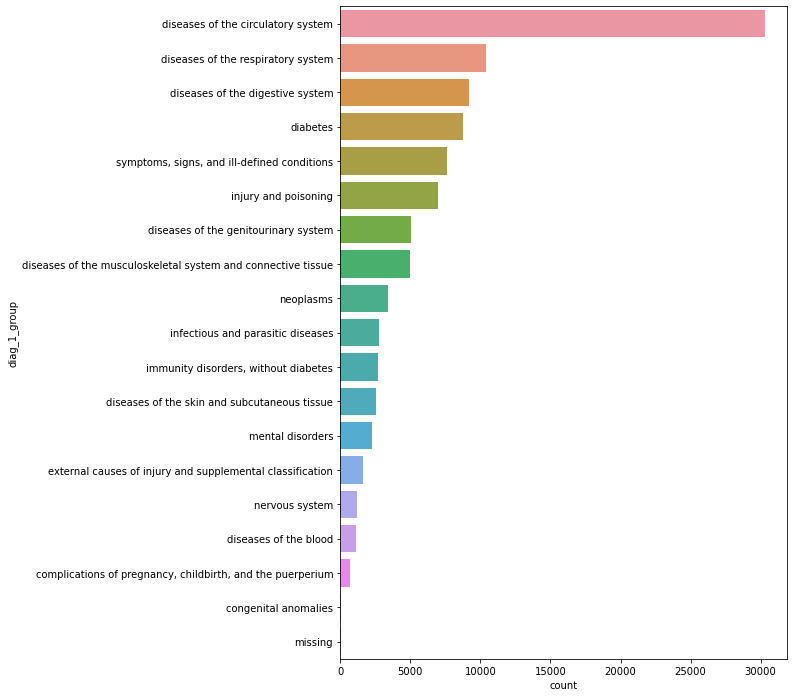

In [32]:
plt.figure(figsize = (8,12))
sns.countplot(y="diag_1_group", data=modeling_df, order = modeling_df['diag_1_group'].value_counts().index, orient='h')

Repeat treatment for diag_2

missing by age:  diag_2_group
complications of pregnancy, childbirth, and the puerperium        415
congenital anomalies                                              108
diabetes                                                        12794
diseases of the blood                                            2926
diseases of the circulatory system                              31365
diseases of the digestive system                                 3962
diseases of the genitourinary system                             7987
diseases of the musculoskeletal system and connective tissue     1764
diseases of the respiratory system                              10251
diseases of the skin and subcutaneous tissue                     3596
external causes of injury and supplemental classification        2536
immunity disorders, without diabetes                             8223
infectious and parasitic diseases                                1931
injury and poisoning                                        

<AxesSubplot:xlabel='count', ylabel='diag_2_group'>

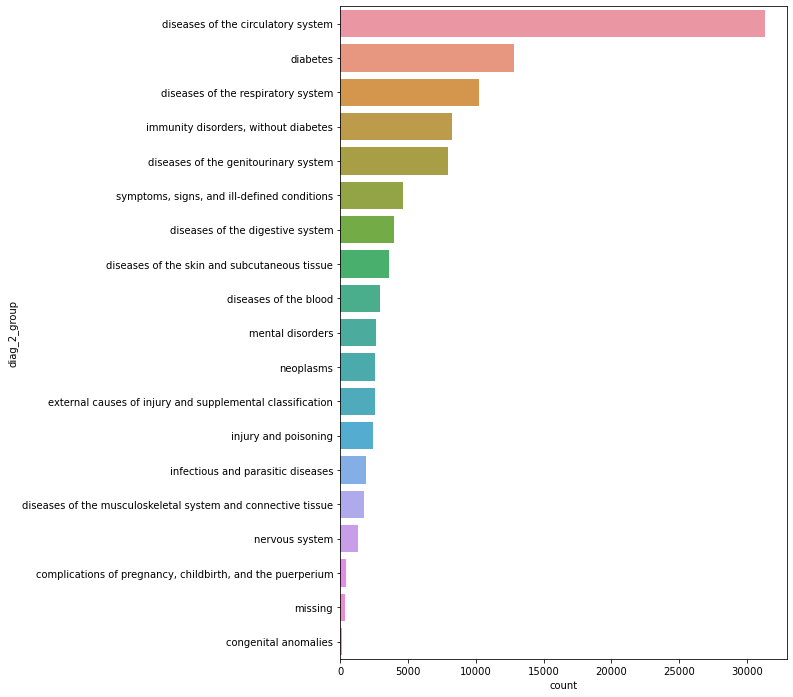

In [33]:
modeling_df['diag_2_group'] = ""

modeling_df['diag_2'] = modeling_df['diag_2'].astype(str)


#temporarily convert "missing" values to -1 so that column can be converted to float allowing filtering by numeric values
modeling_df['diag_2'] = modeling_df['diag_2'].replace('missing', -1)

#temporarily convert values sarting with E or V to zero so that column can be converted to float allowing filtering by numeric values
modeling_df.loc[modeling_df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
modeling_df.loc[modeling_df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0

#No all diag values can be converted into numeric values
modeling_df['diag_2'] = modeling_df['diag_2'].astype(float)


#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']==-1)] = "missing"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']==0)] = "external causes of injury and supplemental classification"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=1) & (modeling_df['diag_2']< 140)] = "infectious and parasitic diseases"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=140) & (modeling_df['diag_2']< 240)] = "neoplasms"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=240) & (modeling_df['diag_2']< 280)] = "immunity disorders, without diabetes"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=250) & (modeling_df['diag_2']< 251)] = "diabetes"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=280) & (modeling_df['diag_2']< 290)] = "diseases of the blood"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=290) & (modeling_df['diag_2']< 320)] = "mental disorders"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=320) & (modeling_df['diag_2']< 390)] = "nervous system"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=390) & (modeling_df['diag_2']< 460)] = "diseases of the circulatory system"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=460) & (modeling_df['diag_2']< 520)] = "diseases of the respiratory system"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=520) & (modeling_df['diag_2']< 580)] = "diseases of the digestive system"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=580) & (modeling_df['diag_2']< 630)] = "diseases of the genitourinary system"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=630) & (modeling_df['diag_2']< 680)] = "complications of pregnancy, childbirth, and the puerperium"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=680) & (modeling_df['diag_2']< 710)] = "diseases of the skin and subcutaneous tissue"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=710) & (modeling_df['diag_2']< 740)] = "diseases of the musculoskeletal system and connective tissue"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=740) & (modeling_df['diag_2']< 760)] = "congenital anomalies"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=760) & (modeling_df['diag_2']< 780)] = "certain conditions originating in the perinatal period"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=780) & (modeling_df['diag_2']< 800)] = "symptoms, signs, and ill-defined conditions"
modeling_df['diag_2_group'].loc[(modeling_df['diag_2']>=800) & (modeling_df['diag_2']< 1000)] = "injury and poisoning"

print('missing by age: ',modeling_df.diag_2_group.groupby(modeling_df.diag_2_group).count())

plt.figure(figsize = (8,12))
sns.countplot(y="diag_2_group", data=modeling_df, order = modeling_df['diag_2_group'].value_counts().index, orient='h')

Repeat treatment for diag_3

diag_3_group
complications of pregnancy, childbirth, and the puerperium        309
congenital anomalies                                               96
diabetes                                                        17157
diseases of the blood                                            2490
diseases of the circulatory system                              29918
diseases of the digestive system                                 3572
diseases of the genitourinary system                             6327
diseases of the musculoskeletal system and connective tissue     1915
diseases of the respiratory system                               6774
diseases of the skin and subcutaneous tissue                     2488
external causes of injury and supplemental classification        5058
immunity disorders, without diabetes                             9151
infectious and parasitic diseases                                1861
injury and poisoning                                             1946
mental 

<AxesSubplot:xlabel='count', ylabel='diag_3_group'>

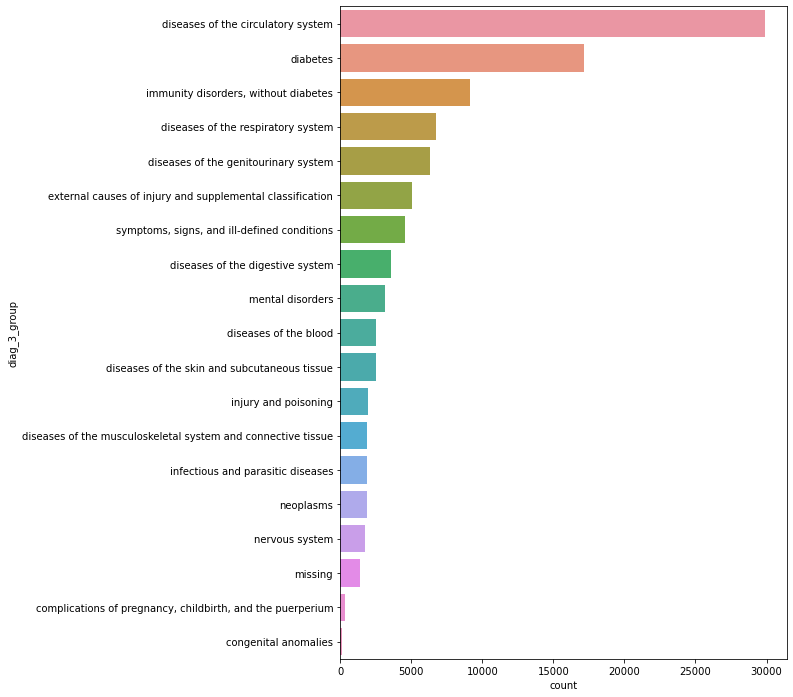

In [34]:
modeling_df['diag_3_group'] = ""

modeling_df['diag_3'] = modeling_df['diag_3'].astype(str)

#temporarily convert "missing" values to -1 so that column can be converted to float allowing filtering by numeric values
modeling_df['diag_3'] = modeling_df['diag_3'].replace('missing', -1)

#temporarily convert values sarting with E or V to zero so that column can be converted to float allowing filtering by numeric values
modeling_df.loc[modeling_df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
modeling_df.loc[modeling_df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#No all diag values can be converted into numeric values
modeling_df['diag_3'] = modeling_df['diag_3'].astype(float)


#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']==-1)] = "missing"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']==0)] = "external causes of injury and supplemental classification"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=1) & (modeling_df['diag_3']< 140)] = "infectious and parasitic diseases"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=140) & (modeling_df['diag_3']< 240)] = "neoplasms"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=240) & (modeling_df['diag_3']< 280)] = "immunity disorders, without diabetes"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=250) & (modeling_df['diag_3']< 251)] = "diabetes"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=280) & (modeling_df['diag_3']< 290)] = "diseases of the blood"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=290) & (modeling_df['diag_3']< 320)] = "mental disorders"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=320) & (modeling_df['diag_3']< 390)] = "nervous system"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=390) & (modeling_df['diag_3']< 460)] = "diseases of the circulatory system"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=460) & (modeling_df['diag_3']< 520)] = "diseases of the respiratory system"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=520) & (modeling_df['diag_3']< 580)] = "diseases of the digestive system"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=580) & (modeling_df['diag_3']< 630)] = "diseases of the genitourinary system"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=630) & (modeling_df['diag_3']< 680)] = "complications of pregnancy, childbirth, and the puerperium"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=680) & (modeling_df['diag_3']< 710)] = "diseases of the skin and subcutaneous tissue"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=710) & (modeling_df['diag_3']< 740)] = "diseases of the musculoskeletal system and connective tissue"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=740) & (modeling_df['diag_3']< 760)] = "congenital anomalies"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=760) & (modeling_df['diag_3']< 780)] = "certain conditions originating in the perinatal period"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=780) & (modeling_df['diag_3']< 800)] = "symptoms, signs, and ill-defined conditions"
modeling_df['diag_3_group'].loc[(modeling_df['diag_3']>=800) & (modeling_df['diag_3']< 1000)] = "injury and poisoning"

print(modeling_df.diag_3_group.groupby(modeling_df.diag_3_group).count())

plt.figure(figsize = (8,12))
sns.countplot(y="diag_3_group", data=modeling_df, order = modeling_df['diag_3_group'].value_counts().index, orient='h')

Drop original diag_ from modeling set, just keep new grouped features 

In [35]:
modeling_df = modeling_df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1)
modeling_df.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_ordered,diag_1_group,diag_2_group,diag_3_group
0,2278392,8222157,Caucasian,Female,6,25,1,1,missing,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,10,diabetes,missing,missing
1,149190,55629189,Caucasian,Female,1,1,7,3,missing,missing,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,20,"immunity disorders, without diabetes",diabetes,"immunity disorders, without diabetes"
2,64410,86047875,AfricanAmerican,Female,1,1,7,2,missing,missing,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,30,"complications of pregnancy, childbirth, and th...",diabetes,external causes of injury and supplemental cla...
3,500364,82442376,Caucasian,Male,1,1,7,2,missing,missing,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,40,infectious and parasitic diseases,diabetes,diseases of the circulatory system
4,16680,42519267,Caucasian,Male,1,1,7,1,missing,missing,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,50,neoplasms,neoplasms,diabetes


max_glu_serum: separate into two features one for whether test was taken and second for results of test which should be ordered, not 1-hot


In [36]:
print(modeling_df.max_glu_serum.unique())

['None' '>300' 'Norm' '>200']


In [37]:
modeling_df['max_glu_serum_ordered'] = ""

modeling_df['max_glu_serum_ordered'].loc[(modeling_df['max_glu_serum']=='None')] = 0
modeling_df['max_glu_serum_ordered'].loc[(modeling_df['max_glu_serum']=='Norm')] = 1
modeling_df['max_glu_serum_ordered'].loc[(modeling_df['max_glu_serum']=='>200')] = 2
modeling_df['max_glu_serum_ordered'].loc[(modeling_df['max_glu_serum']=='>300')] = 3
modeling_df['max_glu_serum_ordered'] = modeling_df['max_glu_serum_ordered'].astype('int64')


print(modeling_df.max_glu_serum.groupby(modeling_df.max_glu_serum).count())
print(modeling_df.max_glu_serum_ordered.groupby(modeling_df.max_glu_serum_ordered).count())


max_glu_serum
>200     1485
>300     1264
None    96420
Norm     2597
Name: max_glu_serum, dtype: int64
max_glu_serum_ordered
0    96420
1     2597
2     1485
3     1264
Name: max_glu_serum_ordered, dtype: int64


In [38]:
modeling_df = modeling_df.drop(['max_glu_serum'], axis=1)


A1Cresult: separate into two features one for whether test was taken and second for results of test which should be ordered, not 1-hot


In [39]:
print(modeling_df.A1Cresult.unique())

['None' '>7' '>8' 'Norm']


In [40]:
modeling_df['A1Cresult_ordered'] = ""

modeling_df['A1Cresult_ordered'].loc[(modeling_df['A1Cresult']=='None')] = 0
modeling_df['A1Cresult_ordered'].loc[(modeling_df['A1Cresult']=='Norm')] = 1
modeling_df['A1Cresult_ordered'].loc[(modeling_df['A1Cresult']=='>7')] = 2
modeling_df['A1Cresult_ordered'].loc[(modeling_df['A1Cresult']=='>8')] = 3
modeling_df['A1Cresult_ordered'] = modeling_df['A1Cresult_ordered'].astype('int64')


print(modeling_df.A1Cresult.groupby(modeling_df.A1Cresult).count())
print(modeling_df.A1Cresult_ordered.groupby(modeling_df.A1Cresult_ordered).count())

A1Cresult
>7       3812
>8       8216
None    84748
Norm     4990
Name: A1Cresult, dtype: int64
A1Cresult_ordered
0    84748
1     4990
2     3812
3     8216
Name: A1Cresult_ordered, dtype: int64


In [41]:
modeling_df = modeling_df.drop(['A1Cresult'], axis=1)


24 medication features: encode for ordering i.e. "no", "down", steady", "up" rather than 1-hot


In [42]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

print(modeling_df.metformin.unique())

['No' 'Steady' 'Up' 'Down']


In [43]:
modeling_df[medications].head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No


In [44]:
for i in medications:
    modeling_df[i].replace({'No':0,
            'Down':1,
            'Steady':2,
            'Up':3}, inplace=True)
    modeling_df[i] = modeling_df[i].astype('int64')


modeling_df[medications].head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [45]:
modeling_df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone                 int64
rosiglitazone                int64
acarbose            

encounter_id & patient_nbr: drop identifier features from modeling set

In [46]:

modeling_df = modeling_df.drop(['encounter_id', 'patient_nbr'], axis=1)



In [47]:
modeling_df.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_ordered,diag_1_group,diag_2_group,diag_3_group,max_glu_serum_ordered,A1Cresult_ordered
0,Caucasian,Female,6,25,1,1,missing,Pediatrics-Endocrinology,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No,No,NO,10,diabetes,missing,missing,0,0
1,Caucasian,Female,1,1,7,3,missing,missing,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,Ch,Yes,>30,20,"immunity disorders, without diabetes",diabetes,"immunity disorders, without diabetes",0,0
2,AfricanAmerican,Female,1,1,7,2,missing,missing,11,5,13,2,0,1,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Yes,NO,30,"complications of pregnancy, childbirth, and th...",diabetes,external causes of injury and supplemental cla...,0,0
3,Caucasian,Male,1,1,7,2,missing,missing,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,Ch,Yes,NO,40,infectious and parasitic diseases,diabetes,diseases of the circulatory system,0,0
4,Caucasian,Male,1,1,7,1,missing,missing,51,0,8,0,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,Ch,Yes,NO,50,neoplasms,neoplasms,diabetes,0,0


One-hot encode categorical variables

In [48]:

modeling_df['admission_type_id'] = modeling_df['admission_type_id'].astype(str)
modeling_df['discharge_disposition_id'] = modeling_df['discharge_disposition_id'].astype(str)
modeling_df['admission_source_id'] = modeling_df['admission_source_id'].astype(str)



Categoricals_to_convert = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id','payer_code','medical_specialty','change','diabetesMed','diag_1_group','diag_2_group','diag_3_group']

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(modeling_df[Categoricals_to_convert],drop_first=True)

#dropping original columns
modeling_df = modeling_df.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
modeling_df = pd.concat([modeling_df,dummies],axis=1)

modeling_df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted,age_ordered,max_glu_serum_ordered,A1Cresult_ordered,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_missing,gender_Male,gender_Unknown/Invalid,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_13,discharge_disposition_id_14,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_2,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_2,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,payer_code_missing,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,medical_specialty_Cardiology-Pediatric,medical_specialty_DCPTEAM,medical_specialty_Dentistry,medical_specialty_Dermatology,medical_specialty_Emergency/Trauma,medical_specialty_Endocrinology,medical_specialty_Endocrinology-Metabolism,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_Hematology/Oncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_Neurophysiology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_OutreachServices,medical_specialty_Pathology,medical_specialty_Pediatrics,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Pediatrics-Endocrinology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_Pediatrics-InfectiousDiseases,medical_specialty_Pediatrics-Neurology,medical_specialty_Pediatrics-Pulmonology,medical_specialty_Perinatology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_PhysicianNotFound,medical_specialty_Podiatry,medical_specialty_Proctology,medical_specialty_Psychiatry,medical_specialty_Psychiatry-Addictive,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Resident,medical_specialty_Rheumatology,medical_spe

In [49]:
modeling_df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [50]:
modeling_df['readmitted'].loc[(modeling_df['readmitted']=='NO')] = 0
modeling_df['readmitted'].loc[(modeling_df['readmitted']=='>30')] = 1
modeling_df['readmitted'].loc[(modeling_df['readmitted']=='<30')] = 2

In [51]:
modeling_df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted,age_ordered,max_glu_serum_ordered,A1Cresult_ordered,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_missing,gender_Male,gender_Unknown/Invalid,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_13,discharge_disposition_id_14,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_2,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_2,admission_source_id_20,admission_source_id_22,admission_source_id_25,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,payer_code_missing,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,medical_specialty_Cardiology-Pediatric,medical_specialty_DCPTEAM,medical_specialty_Dentistry,medical_specialty_Dermatology,medical_specialty_Emergency/Trauma,medical_specialty_Endocrinology,medical_specialty_Endocrinology-Metabolism,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_Hematology/Oncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_Neurophysiology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_OutreachServices,medical_specialty_Pathology,medical_specialty_Pediatrics,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Pediatrics-Endocrinology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_Pediatrics-InfectiousDiseases,medical_specialty_Pediatrics-Neurology,medical_specialty_Pediatrics-Pulmonology,medical_specialty_Perinatology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_PhysicianNotFound,medical_specialty_Podiatry,medical_specialty_Proctology,medical_specialty_Psychiatry,medical_specialty_Psychiatry-Addictive,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Resident,medical_specialty_Rheumatology,medical_spe

In [52]:
modeling_df.shape

(101766, 235)

Prepared modeling set including one-hot encoded variables, has 234 features plus the target "readmitted" with 101,766 records

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import time

Split the host dataframe to preserve a validation set for comparing models after tuning on CV of initial train/test split. We are using the stratified shuffle split so the validation set is representative of classes, as well as random_state so the if this code is run multiple times we get the same splits for consistentcy

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_valid_index in split.split(modeling_df, modeling_df.readmitted):
    host_modeling = modeling_df.iloc[train_index]
    host_validation = modeling_df.iloc[test_valid_index]

In [55]:
print("Size of modeling set (to be CV split): ",host_modeling.shape)
print("Size of hold back validation set: ",host_validation.shape)

Size of modeling set (to be CV split):  (91589, 235)
Size of hold back validation set:  (10177, 235)


In [56]:
#Create new X predictor matrix
X_host = host_modeling.drop(['readmitted'],axis=1).values #droping target
y_host = host_modeling['readmitted'].values
y_host = y_host.astype(int)

#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_host)
C = scl_obj.transform(X_host)

In [57]:
pd.DataFrame(X_host).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233
0,3,52,3,12,2,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,58,3,25,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,70,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,4,10,3,14,0,0,0,8,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,80,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,11,44,1,14,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,70,0,3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,12,78,6,21,0,0,1,9,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
pd.DataFrame(y_host).head()

,0
0,1
1,0
2,1
3,1
4,1


In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold


num_cv_iterations = 10 #Change to 10 fold for final optimization (longer compute time)
num_instances = len(y_host)
cv_object = StratifiedKFold(n_splits=num_cv_iterations, shuffle=True, random_state=27)


Create predictor variable matrix (X) and target matrix (y) then

Scale predictor variables, so that coefficient weights can be compared for significance after modeling

In [60]:
#Create new X predictor matrix
X_host_validate = host_validation.drop(['readmitted'],axis=1).values #droping target
y_host_validate = host_validation['readmitted'].values
y_host_validate = y_host_validate.astype(int)

#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_host_validate)
X_host_validate = scl_obj.transform(X_host_validate)

### Base Model with 10-fold stratified cross validation

Since our goal was to provide guidance on what the most important factors are to become a superhost, model interpretability is more important than classification. For this reason we chose accuracy as a more important metric than sensitivity or specificity. Using a Logistic Regression with host level data and no class weight gives us the best balance of accuracy (86%), interpretability, and fast run times in the event we add more data or cities in further analysis


Load libraries needed for modeling & create a scoring dictionary for metrics used to compare models

In [61]:
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average = 'macro'),
    'recall': make_scorer(recall_score, average = 'macro')
}

In [63]:
#lr does not have weights applied
start_time = time.time()
lr = LogisticRegression(penalty='l1', C=1, class_weight=None, solver='saga', max_iter=100 ) # get object

cv_results = sklearn.model_selection.cross_validate(lr, X_host, y_host, cv=cv_object, scoring=scorer, error_score="raise") #lr does not have weights applied
print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Precision = ",cv_results['test_precision'].mean())
print("Mean Recall = ",cv_results['test_recall'].mean())
print("Run Time: ",time.time() - start_time, "seconds")

{'fit_time': array([33.53175592, 33.17807293, 33.69089985, 33.27649617, 33.3323679 ,
       33.64339399, 33.50656199, 33.21236515, 33.6006012 , 33.18713427]), 'score_time': array([0.00936508, 0.00665522, 0.00737476, 0.00623488, 0.00623679,
       0.00694108, 0.00626016, 0.00724506, 0.006217  , 0.00646472]), 'test_accuracy': array([0.58761874, 0.58816465, 0.58478   , 0.59329621, 0.57746479,
       0.58521673, 0.58270554, 0.58183208, 0.58117698, 0.58003931]), 'test_precision': array([0.52408864, 0.50998298, 0.48915035, 0.52451686, 0.47358919,
       0.50216712, 0.48151231, 0.52117615, 0.52638984, 0.56603191]), 'test_recall': array([0.40517537, 0.40513522, 0.402826  , 0.40981598, 0.39878386,
       0.40627147, 0.40114335, 0.40189123, 0.40058924, 0.40010164])}
Mean Accuracy =  0.5842295014664253
Mean Precision =  0.5118605362893107
Mean Recall =  0.4031733357697628
Run Time:  334.278226852417 seconds


# Tune Hyperparameters with Grid Search on 10-fold cross validation set

Using <a id="LegRegGridSearch"></a> Grid Search to find the best logistic regression classification model.

<a href="#bottom">Back to bottom</a>

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

parameters = {
                'penalty': ['elasticnet'], 
                'C': [1, 10, 20, 50],
                'solver': ['saga'],
                'class_weight': [None, 'balanced'],
                'l1_ratio': [0.01, 0.1, 0.2, 0.5]
             }


clf = LogisticRegression()

import warnings

with warnings.catch_warnings():
   warnings.simplefilter('ignore')
   grid_obj = RandomizedSearchCV(clf, parameters, n_iter = 5, cv = cv_object, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
   grid_obj = grid_obj.fit(X_host, y_host)



Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  51.7s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  52.0s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  52.0s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  52.2s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  52.3s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  52.4s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  52.9s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  53.6s
[CV] END C=10, class_weight=balanced, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=  51.4s
[CV

In [66]:
print(grid_obj.best_estimator_.get_params())

#print('Model accuracy is',grid_obj.score(X_host, y_host))

{'C': 50, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.1, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'elasticnet', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

parameters = {
                'penalty': ['elasticnet'], 
                'C': [1, 10, 20, 50],
                'solver': ['saga'],
                'class_weight': [None, 'balanced'],
                'l1_ratio': [0.01, 0.1, 0.2, 0.5]
             }


clf = LogisticRegression()

import warnings

with warnings.catch_warnings():
   warnings.simplefilter('ignore')
   grid_obj = RandomizedSearchCV(clf, parameters, n_iter = 5, cv = cv_object, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
   grid_obj = grid_obj.fit(X_host, y_host)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  52.2s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  52.4s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  52.5s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  53.1s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  53.2s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  53.6s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  53.7s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  55.0s
[CV] END C=50, class_weight=balanced, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=  53.3s
[CV

In [69]:
print(grid_obj.best_estimator_.get_params())

{'C': 50, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': 0.01, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'elasticnet', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [116]:
#lr does not have weights applied
start_time = time.time()
lr2 = LogisticRegression(penalty='elasticnet', C=50, l1_ratio=0.01, class_weight=None, solver='saga', max_iter=100, multi_class='multinomial') # get object

cv_results = sklearn.model_selection.cross_validate(lr, X_host, y_host, cv=cv_object, scoring=scorer, error_score="raise") #lr does not have weights applied
print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Precision = ",cv_results['test_precision'].mean())
print("Mean Recall = ",cv_results['test_recall'].mean())
print("Run Time: ",time.time() - start_time, "seconds")

{'fit_time': array([33.12769413, 32.01484585, 32.20558786, 32.80712414, 34.61877608,
       32.68257523, 32.18651915, 32.38871288, 33.42346978, 32.82547212]), 'score_time': array([0.02231884, 0.00848103, 0.00775886, 0.01146603, 0.01539016,
       0.00799298, 0.01284194, 0.00822926, 0.01104307, 0.00890064]), 'test_accuracy': array([0.58750955, 0.58805546, 0.58467082, 0.59362376, 0.57757397,
       0.58532591, 0.58226881, 0.58226881, 0.58084944, 0.57982092]), 'test_precision': array([0.52085457, 0.50980861, 0.49105462, 0.52146715, 0.47371649,
       0.50593474, 0.47548719, 0.52536501, 0.51877535, 0.57219045]), 'test_recall': array([0.40521795, 0.4051411 , 0.40301715, 0.41020197, 0.39896145,
       0.40689298, 0.40079994, 0.40264008, 0.39987005, 0.40000328])}
Mean Accuracy =  0.5841967444144732
Mean Precision =  0.5114654182873437
Mean Recall =  0.4032745952620809
Run Time:  328.4732847213745 seconds


Grid Search shows small improvement to accuracy using the "saga" solver 

# Make predictions on hold back validation set to compare metrics to the CV model

In [141]:
lr = LogisticRegression(penalty='elasticnet', C=50, l1_ratio=0.01, class_weight=None, solver='saga', max_iter=100, multi_class='ovr') # get object

lr_model_fit = lr.fit(X_host,y_host)
lr_validation_predictions = lr.predict(X_host_validate)


In [142]:
#print(lr_validation_predictions)
from sklearn.metrics import accuracy_score
print("Validation Set Accuracy: ", accuracy_score(y_host_validate, lr_validation_predictions))

Validation Set Accuracy:  0.5423995283482362


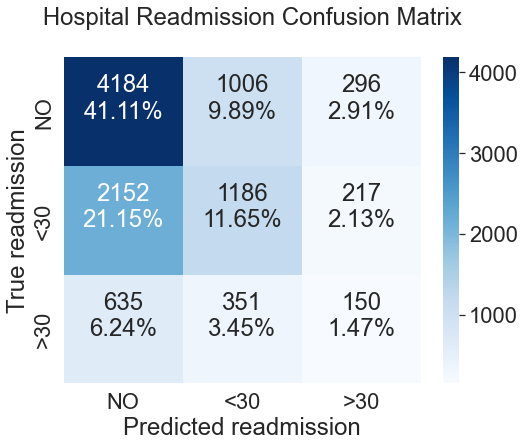

In [143]:

def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    x_axis_labels = ['NO','<30', '>30']
    y_axis_labels = ['NO','<30', '>30']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('   Hospital Readmission Confusion Matrix\n')
    plt.xlabel("Predicted readmission")
    plt.ylabel("True readmission") 


lr_cm = confusion_matrix(y_host_validate,lr_validation_predictions)
plot_confusion(lr_cm)

# Logistic Regression Feature Importance

## Weights for predicting NO Readmission (class-0)

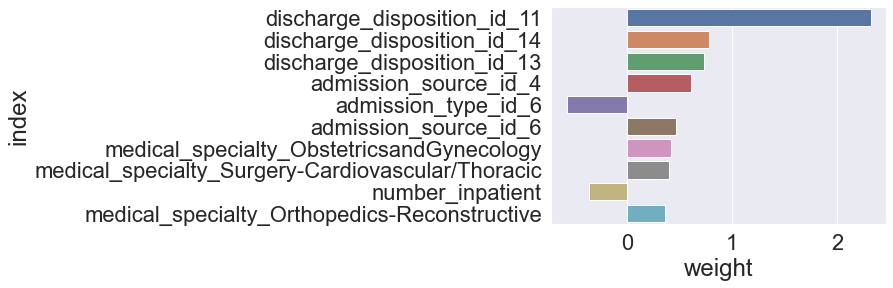

In [144]:
weights = lr_model_fit.coef_[0].T # take transpose to make a column vector
variable_names = host_validation.drop(['readmitted'],axis=1).columns 

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.reset_index(level=0, inplace=True)

ax = sns.barplot(y="index", x="weight", data=coefficients.head(10))


## Weights for predicting Readmission > 30 Days (class-1)

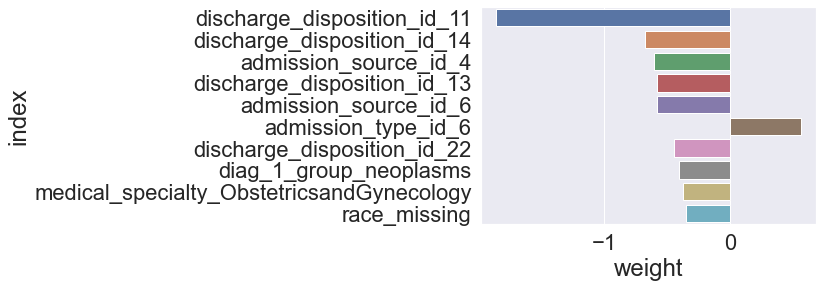

In [145]:
weights = lr_model_fit.coef_[1].T # take transpose to make a column vector
variable_names = host_validation.drop(['readmitted'],axis=1).columns 

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.reset_index(level=0, inplace=True)

ax = sns.barplot(y="index", x="weight", data=coefficients.head(10))

## Weights for predicting Readmission < 30 Days (class-2)

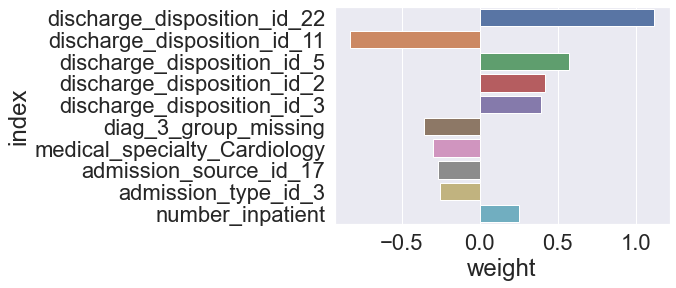

In [146]:
weights = lr_model_fit.coef_[2].T # take transpose to make a column vector
variable_names = host_validation.drop(['readmitted'],axis=1).columns 

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.reset_index(level=0, inplace=True)

ax = sns.barplot(y="index", x="weight", data=coefficients.head(10))

In [147]:
weights = lr_model_fit.coef_.T # take transpose to make a column vector
variable_names = host_validation.drop(['readmitted'],axis=1).columns 

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'Not_Readmitted'})
coefficients = coefficients.rename(columns={coefficients.columns[1]: 'More_than_30'})
coefficients = coefficients.rename(columns={coefficients.columns[2]: 'Less_than_30'})
coefficients['Sum_absolute'] = abs(coefficients.Not_Readmitted) + abs(coefficients.More_than_30) + abs(coefficients.Less_than_30)
coefficients = coefficients.sort_values(by='Sum_absolute', key=abs, ascending=False)
coefficients.reset_index(level=0, inplace=True)

coefficients.head(20)

,index,Not_Readmitted,More_than_30,Less_than_30,Sum_absolute
0,discharge_disposition_id_11,2.320633,-1.860585,-0.833589,5.014807
1,discharge_disposition_id_22,-0.328546,-0.444267,1.119901,1.892714
2,discharge_disposition_id_14,0.775074,-0.679319,-0.115572,1.569964
3,discharge_disposition_id_13,0.731923,-0.581148,-0.188374,1.501445
4,admission_source_id_4,0.611033,-0.607266,-0.164627,1.382927
5,admission_source_id_6,0.462107,-0.576489,-0.133489,1.172086
6,admission_type_id_6,-0.578136,0.565965,-0.027302,1.171403
7,medical_specialty_ObstetricsandGynecology,0.420762,-0.370021,-0.228144,1.018928
8,discharge_disposition_id_5,-0.231785,-0.168913,0.575316,0.976013
9,diag_1_group_neoplasms,0.354077,-0.406307,-0.130227,0.890611


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_host_validate,lr_validation_predictions, 
                            target_names=['Not_Readmitted', 'More_than_30', 'Less_than_30']))

                precision    recall  f1-score   support

Not_Readmitted       0.60      0.76      0.67      5486
  More_than_30       0.47      0.33      0.39      3555
  Less_than_30       0.23      0.13      0.17      1136

      accuracy                           0.54     10177
     macro avg       0.43      0.41      0.41     10177
  weighted avg       0.51      0.54      0.52     10177



# Can we get probabilities for each class and tune for accuracy on <30 days?

# Should we drop rows for people who expired then re-check feature importance for rest?